In [63]:
import pandas as pd
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

Train Dataset:
   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake  
0        1000       955     0  
1        2740      

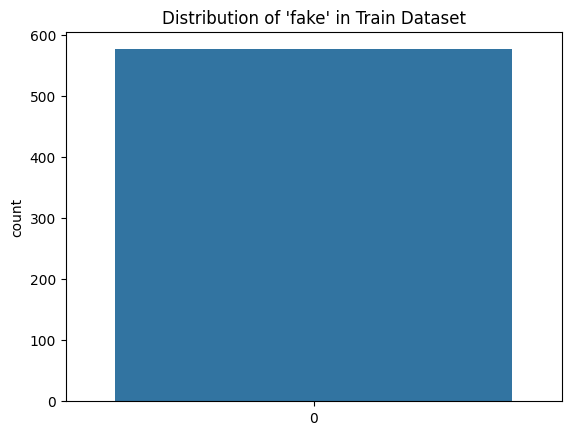

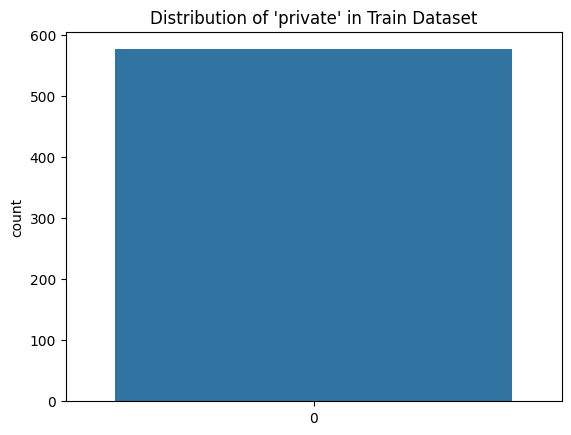

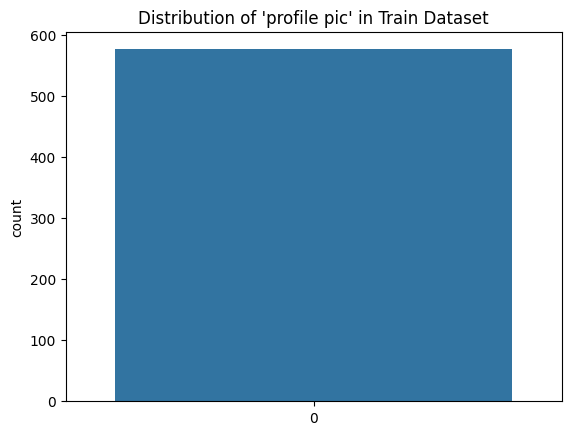

C:\Users\Padmapriya\AppData\Local\Temp\ipykernel_11820\2487318199.py:78: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['nums/length username'])


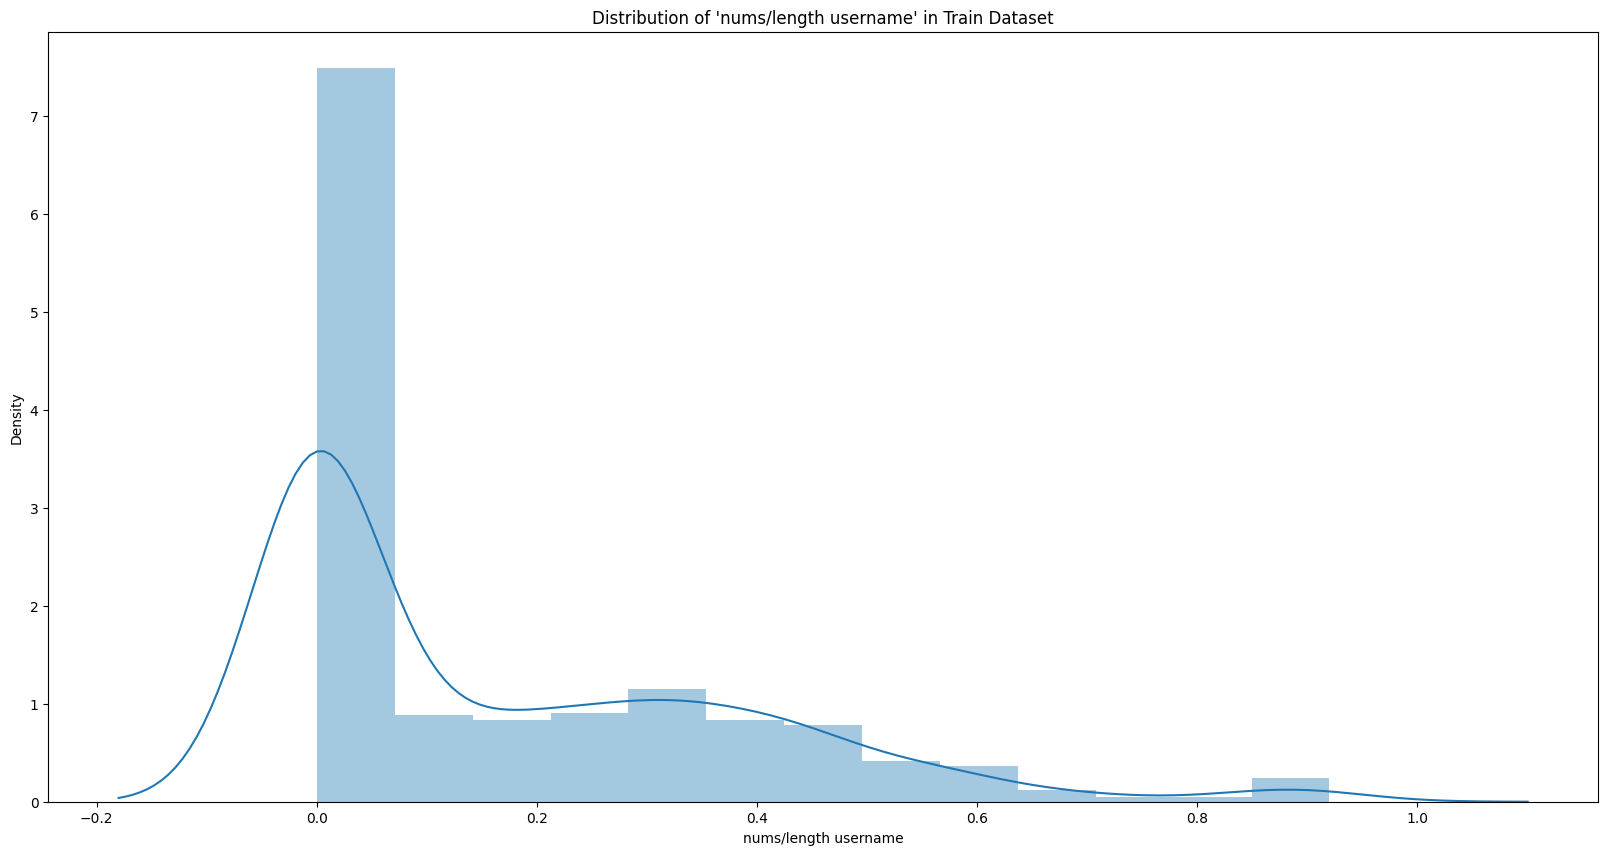

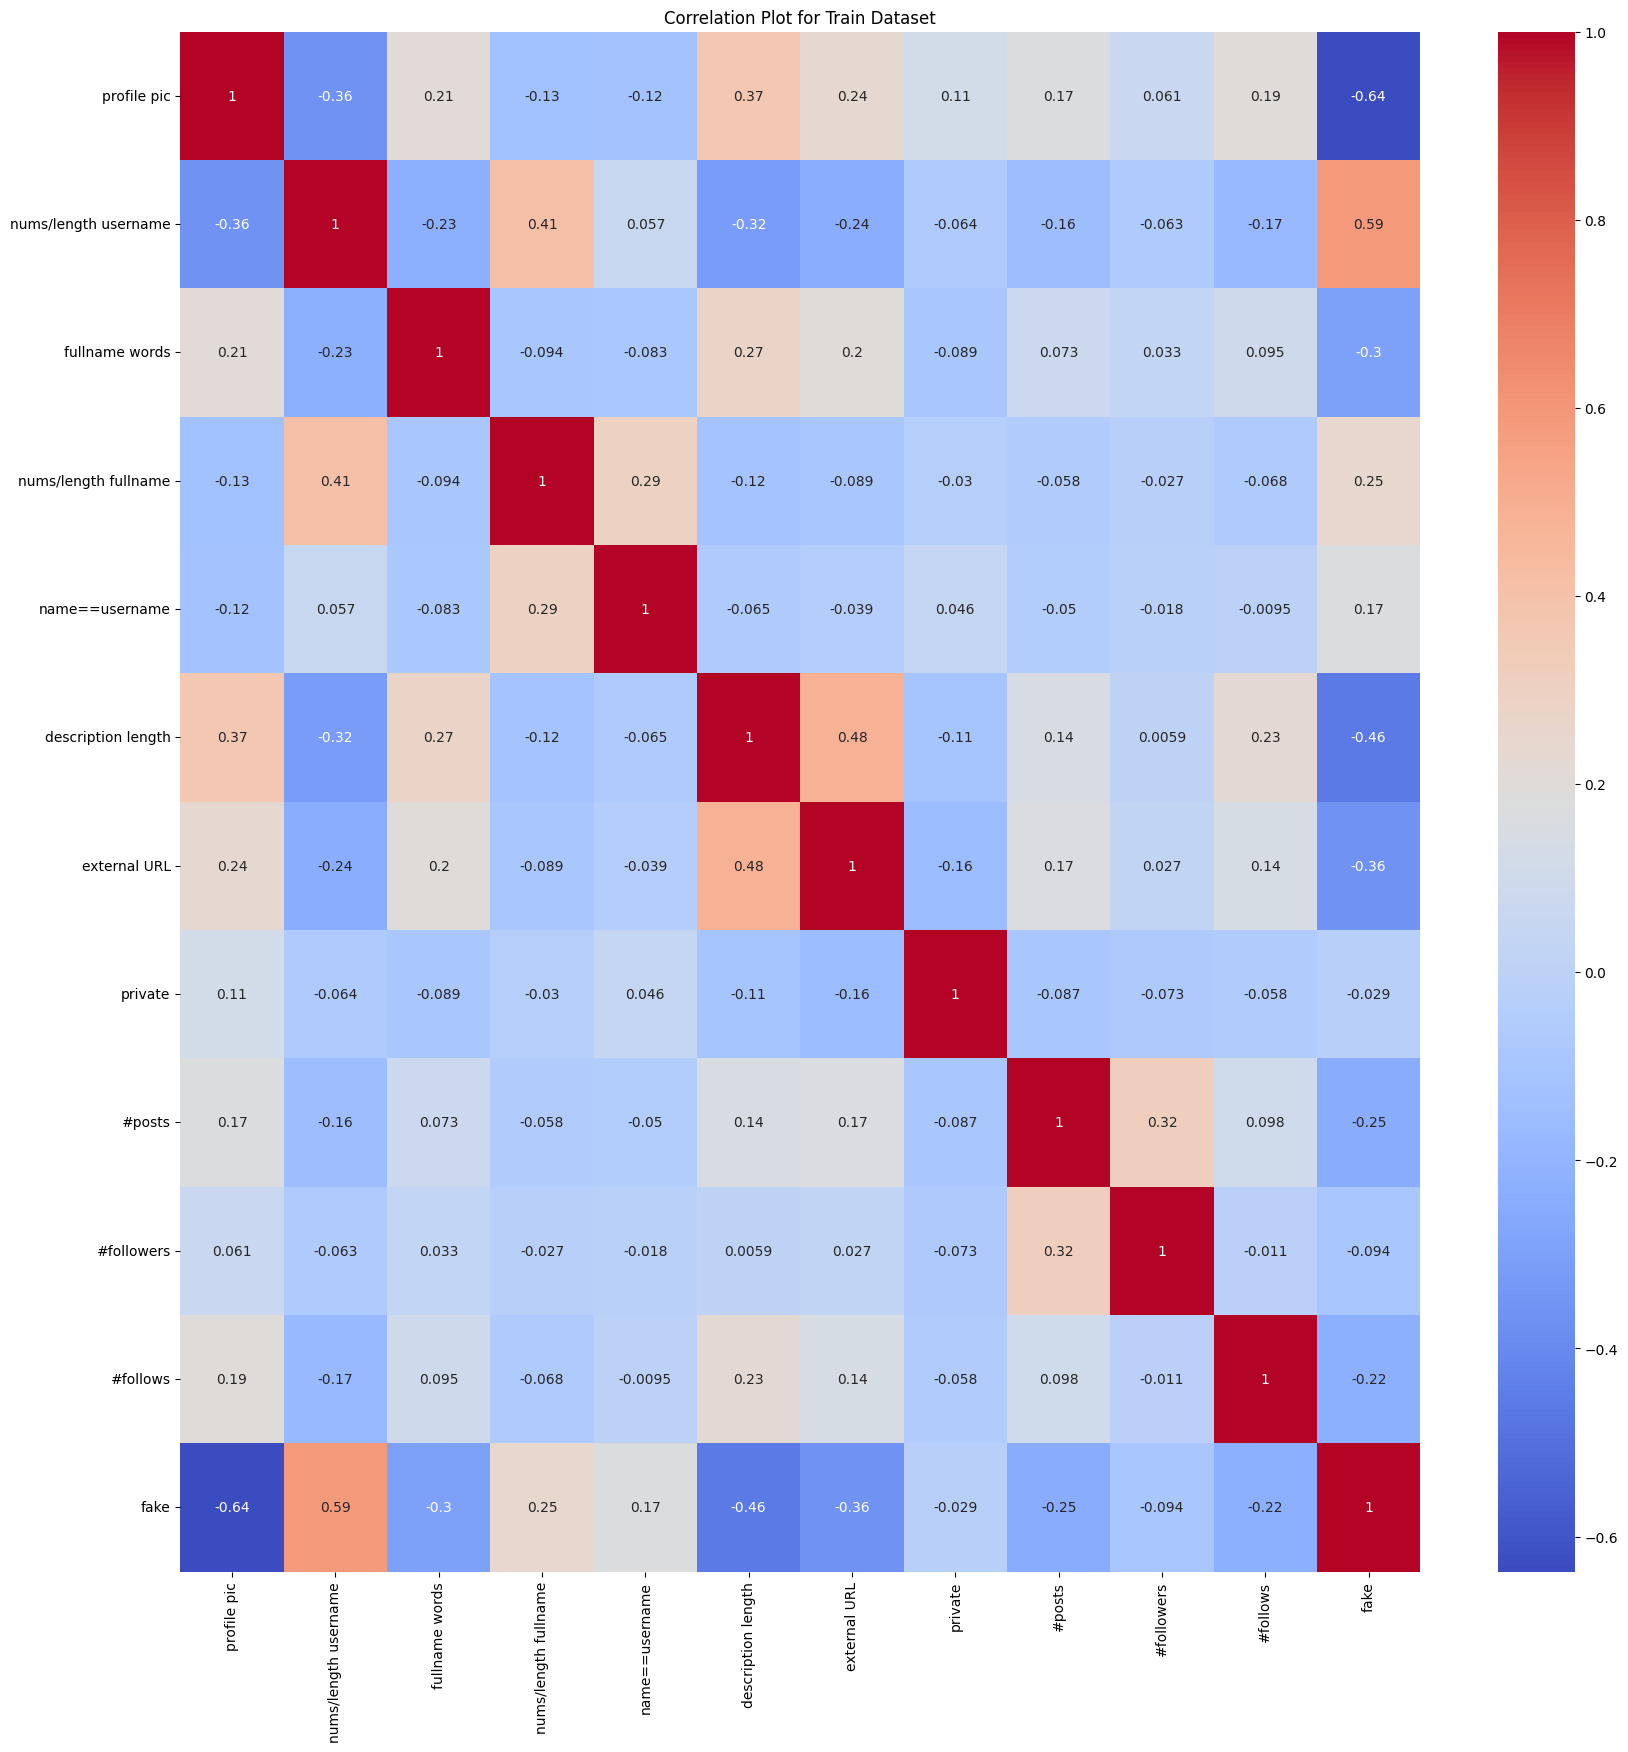

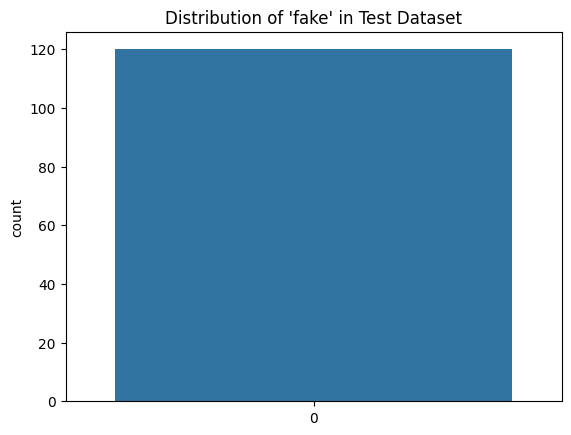

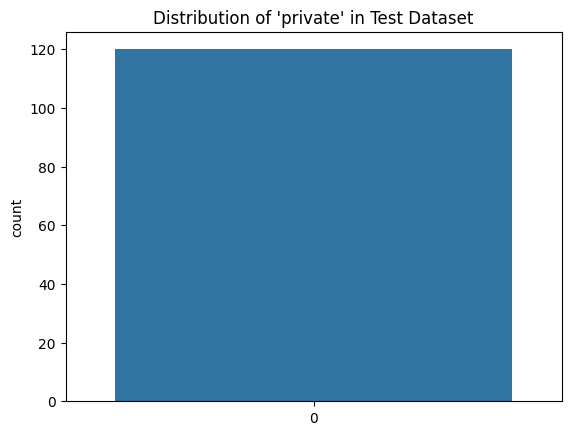

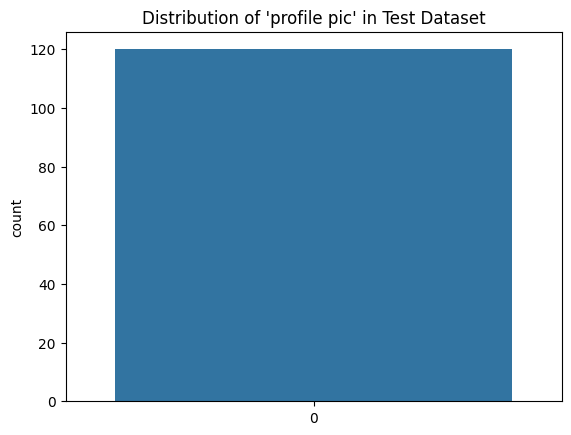

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load train and test datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Display the first few rows of the train dataset
print("Train Dataset:")
print(train.head())

# Display the last few rows of the train dataset
print(train.tail())

# Display the first few rows of the test dataset
print("Test Dataset:")
print(test.head())

# Display the last few rows of the test dataset
print(test.tail())

# Getting dataframe info for train dataset
print("Train Dataset Info:")
print(train.info())

# Get the statistical summary of the train dataset
print("Train Dataset Summary:")
print(train.describe())

# Checking if null values exist in train dataset
print("Null Values in Train Dataset:")
print(train.isnull().sum())

# Get the number of unique values in the "profile pic" feature in train dataset
print("Unique Values in 'profile pic' feature in Train Dataset:")
print(train['profile pic'].value_counts())

# Get the number of unique values in "fake" (Target column) in train dataset
print("Unique Values in 'fake' (Target column) in Train Dataset:")
print(train['fake'].value_counts())

# Getting dataframe info for test dataset
print("Test Dataset Info:")
print(test.info())

# Get the statistical summary of the test dataset
print("Test Dataset Summary:")
print(test.describe())

# Checking if null values exist in test dataset
print("Null Values in Test Dataset:")
print(test.isnull().sum())

# Get the number of unique values in "fake" (Target column) in test dataset
print("Unique Values in 'fake' (Target column) in Test Dataset:")
print(test['fake'].value_counts())

# Perform Data Visualizations

# Visualize the data
sns.countplot(train['fake'])
plt.title("Distribution of 'fake' in Train Dataset")
plt.show()

# Visualize the private column data
sns.countplot(train['private'])
plt.title("Distribution of 'private' in Train Dataset")
plt.show()

# Visualize the "profile pic" column data
sns.countplot(train['profile pic'])
plt.title("Distribution of 'profile pic' in Train Dataset")
plt.show()

# Visualize the data
plt.figure(figsize=(20, 10))
sns.distplot(train['nums/length username'])
plt.title("Distribution of 'nums/length username' in Train Dataset")
plt.show()

# Correlation plot for train dataset
plt.figure(figsize=(20, 20))
cm = train.corr()
sns.heatmap(cm, annot=True, cmap="coolwarm")
plt.title("Correlation Plot for Train Dataset")
plt.show()

# Visualize the distribution of 'fake' in test dataset
sns.countplot(test['fake'])
plt.title("Distribution of 'fake' in Test Dataset")
plt.show()

# Visualize the distribution of 'private' in test dataset
sns.countplot(test['private'])
plt.title("Distribution of 'private' in Test Dataset")
plt.show()

# Visualize the distribution of 'profile pic' in test dataset
sns.countplot(test['profile pic'])
plt.title("Distribution of 'profile pic' in Test Dataset")
plt.show()


In [66]:
# Preparing Data to Train the Model

# Training and testing dataset (inputs)
X_train = train.drop(columns = ['fake'])
X_test = test.drop(columns = ['fake'])

print(X_train,X_test)


# Training and testing dataset (Outputs)
y_train = train['fake']
y_test = test['fake']

print(y_train,y_test)


# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

print(y_train,y_test)



# print the shapes of training and testing datasets 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Training_data = len(X_train)/( len(X_test) + len(X_train) ) * 100


Testing_data = len(X_test)/( len(X_test) + len(X_train) ) * 100


print(Training_data, Testing_data)

     profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.27               0                  0.00   
1              1                  0.00               2                  0.00   
2              1                  0.10               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.00               2                  0.00   
..           ...                   ...             ...                   ...   
571            1                  0.55               1                  0.44   
572            1                  0.38               1                  0.33   
573            1                  0.57               2                  0.00   
574            1                  0.57               1                  0.00   
575            1                  0.27               1                  0.00   

     name==username  description length

In [67]:
train_data_path = 'insta_train.csv'
test_data_path = 'insta_test.csv'

pd.read_csv(test_data_path)


train_data_path = 'train.csv'
test_data_path = 'test.csv'

pd.read_csv(train_data_path)

# Load the training dataset
instagram_df_train=pd.read_csv(train_data_path)
instagram_df_train

# Load the testing data
instagram_df_test=pd.read_csv(test_data_path)
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [68]:


#from data_preprocess_model import X_train,y_train,X_test,y_test

# Building and Training Deep Training Model

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

model.summary()

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

epochs_hist = model.fit(X_train, y_train, epochs = 50,  verbose = 1, validation_split = 0.1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                600       
                                                                 
 dense_6 (Dense)             (None, 150)               7650      
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 dropout_4 (Dropout)         (None, 150)               0         
                                                                 
 dense_8 (Dense)             (None, 25)                3775      
                                                                 
 dropout_5 (Dropout)         (None, 25)               

4/4 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        60
           1       0.88      0.87      0.87        60

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120



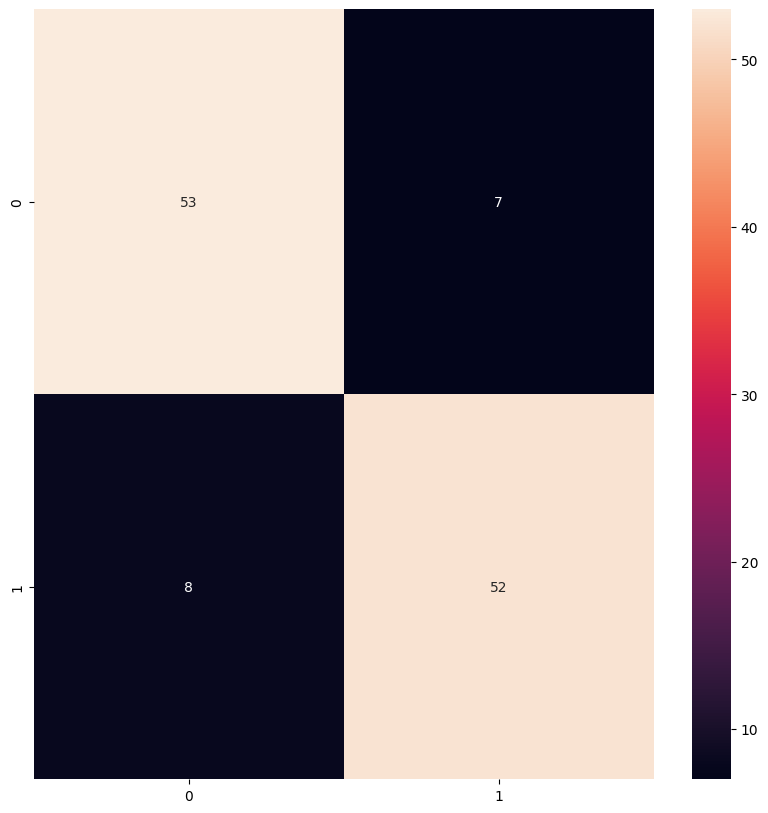

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [13]:
#from main_model import model, epochs_hist
#from data_preprocess_model import X_test,y_test
#from import_libs import *


predicted = model.predict(X_test)

predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))
    
for i in y_test:
    test.append(np.argmax(i))

print(classification_report(test, predicted_value))

plt.figure(figsize=(10, 10))
cm=confusion_matrix(test, predicted_value)
sns.heatmap(cm, annot=True)
plt.show()

# Access the Performance of the model

print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


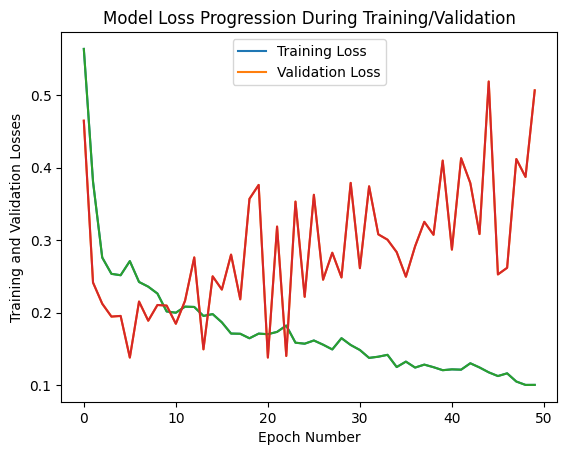

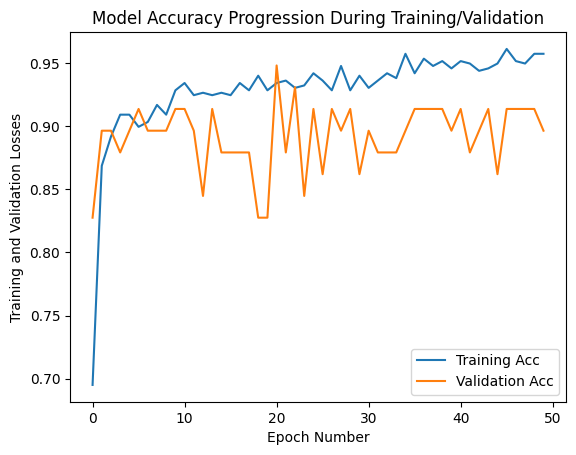

    Accuracy  Validation_Accuracy      Loss  Validation Loss
0   0.694981             0.827586  0.563677         0.464685
1   0.868726             0.896552  0.380589         0.241479
2   0.891892             0.896552  0.276013         0.212335
3   0.909266             0.879310  0.253514         0.194567
4   0.909266             0.896552  0.251595         0.195468
5   0.899614             0.913793  0.271071         0.138025
6   0.903475             0.896552  0.242311         0.215319
7   0.916988             0.896552  0.235816         0.188896
8   0.909266             0.896552  0.226332         0.210547
9   0.928571             0.913793  0.201654         0.209700
10  0.934363             0.913793  0.199898         0.184687
11  0.924710             0.896552  0.208274         0.216427
12  0.926641             0.844828  0.207847         0.276146
13  0.924710             0.913793  0.195462         0.149413
14  0.926641             0.879310  0.197995         0.250105
15  0.924710            

In [69]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
print(epochs_hist.history.keys())

plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()


plt.plot(epochs_hist.history['accuracy'])
plt.plot(epochs_hist.history['val_accuracy'])



plt.title('Model Accuracy Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Acc', 'Validation Acc'])
plt.show()


dicts = {
    'Accuracy' : epochs_hist.history['accuracy'],
    'Validation_Accuracy' : epochs_hist.history['val_accuracy'],
    'Loss' : epochs_hist.history['loss'],
    'Validation Loss' : epochs_hist.history['val_loss']



}

model_training_progress = pd.DataFrame(dicts)
model_training_progress

print(model_training_progress)

def get_avg(lst):
    return sum(lst) / len(lst)


print("Accuracy : ", get_avg(model_training_progress['Accuracy']) * 100)

print("Validation Accuracy : ", get_avg(model_training_progress['Validation_Accuracy']) * 100)


print("Loss : ", get_avg(model_training_progress['Loss']) * 100)


print("Validation Loss : ", get_avg(model_training_progress['Validation Loss']) * 100)


In [70]:
predicted

array([[3.17070126e-09, 1.00000000e+00],
       [9.99986291e-01, 1.36641174e-05],
       [9.99550641e-01, 4.49333631e-04],
       [9.99987960e-01, 1.20868153e-05],
       [1.72977939e-01, 8.27022076e-01],
       [9.35012758e-01, 6.49872273e-02],
       [9.06121492e-01, 9.38784927e-02],
       [9.97258663e-01, 2.74125580e-03],
       [9.96842861e-01, 3.15720285e-03],
       [9.58873272e-01, 4.11267430e-02],
       [9.51644242e-01, 4.83557060e-02],
       [9.99999404e-01, 5.50239065e-07],
       [9.93648827e-01, 6.35115756e-03],
       [8.41299713e-01, 1.58700243e-01],
       [9.81477857e-01, 1.85220819e-02],
       [9.98584867e-01, 1.41517515e-03],
       [9.09820020e-01, 9.01799649e-02],
       [9.93150055e-01, 6.84996787e-03],
       [9.99996066e-01, 3.93392702e-06],
       [9.98698115e-01, 1.30189268e-03],
       [1.72408391e-03, 9.98275876e-01],
       [9.38603997e-01, 6.13960624e-02],
       [9.83678341e-01, 1.63217299e-02],
       [9.98582125e-01, 1.41794281e-03],
       [9.655391

In [71]:
import numpy as np

# Prepare the input data
input_data = pd.DataFrame({
    'profile pic': [0],
    'nums/length username': [6],
    'fullname words': [5],
    'nums/length fullname': [4],
    'name==username': [0],
    'description length': [10],
    'external URL': [0],
    'private': [0],
    '#posts': [0],
    '#followers': [1],
    '#follows': [95]
})

# Scale the input data using the same scaler
scaled_input_data = scaler_x.transform(input_data)

# Use the trained model to predict
predicted_probabilities = model.predict(scaled_input_data)
predicted_label = np.argmax(predicted_probabilities)

# Print the predicted label (0 for fake, 1 for not fake)
print("Predicted Label:", predicted_label)


1/1 [==============================] - 0s 71ms/step
Predicted Label: 1


ValueError: x and y must have same first dimension, but have shapes (7,) and (2,)

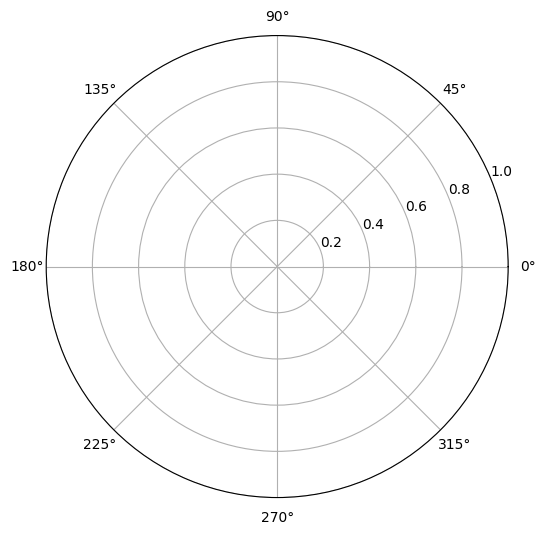

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of variables (i.e., categories)
num_vars = 6

# Define the values for each variable (here, only one data point)
values = [93]

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
values += values[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(['Variable 1', 'Variable 2', 'Variable 3', 'Variable 4', 'Variable 5', 'Variable 6'])
ax.set_ylim(0, 100)

plt.show()


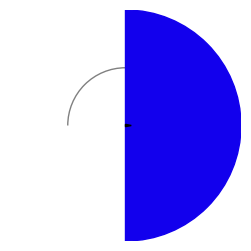

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Wedge, Polygon

def gradient_color(value):
    # Define colors for gradient
    red = [1, 0, 0]  # Red
    blue = [0, 0, 1]  # Blue
    
    # Calculate interpolation weights based on value
    weight_red = max(0, min(1, (100 - value) / 100))
    weight_blue = max(0, min(1, value / 100))
    
    # Interpolate between red and blue based on value
    color = [weight_red * red[i] + weight_blue * blue[i] for i in range(3)]
    
    return color

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 3))

# Draw semi-circle
ax.add_patch(Arc((0, 0), 100, 100, theta1=0, theta2=180, color='gray'))

# Draw gradient wedge
gradient = Wedge((0, 0), 100, -90, 90, width=100, color=gradient_color(93))
ax.add_patch(gradient)

# Plot pointer
pointer = Polygon([[0, -1], [5, 0], [0, 1]], closed=True, color='black')
ax.add_patch(pointer)

# Set aspect ratio to equal, hide axes, and set limits
ax.set_aspect('equal', adjustable='box')
ax.axis('off')
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)

plt.show()


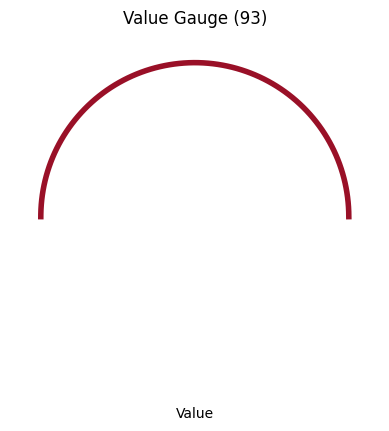

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Define angles for the semicircle
theta = np.linspace(0, np.pi, 200)

# Calculate radius (adjust for chart size)
radius = 1

# Create a colormap for the gradient
cmap = plt.cm.RdBu_r

# Normalize values for the colormap (0 to 1)
norm = plt.Normalize(vmin=0, vmax=100)

# Calculate x and y coordinates for the semicircle
a = radius * np.cos( theta )
b = radius * np.sin( theta )

# Calculate color values based on angle (0 to 1 for colormap)
colors = cmap(norm(93))  # Set color based on target value (93)

# Create the plot
fig, ax = plt.subplots()

# Plot the semicircle arc
arc = ax.plot(a, b, color=colors, linewidth=4)

# Set aspect ratio for a semicircle
ax.set_aspect("equal")

# Set labels (optional)
ax.set_xlabel("Value")
# Remove unnecessary labels on semicircle
ax.set_xticks([])
ax.set_ylabel("")
# Remove unnecessary labels on the right side
ax.set_yticks([])

# Set limits slightly bigger than radius for aesthetics
ax.set_xlim(-radius - radius/5, radius + radius/5)
ax.set_ylim(-radius - radius/5, radius + radius/5)

# Set background color to transparent for a cleaner look
ax.set_facecolor('none')

# Remove unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add a title (optional)
ax.set_title("Value Gauge (93)")

plt.show()


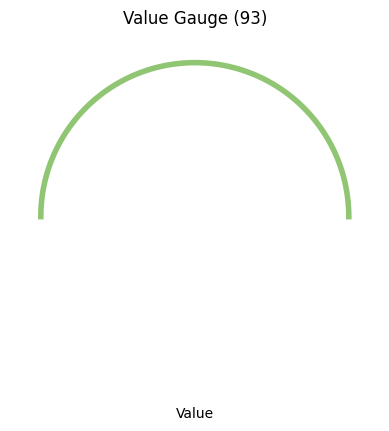

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Define angles for the semicircle
theta = np.linspace(0, np.pi, 200)

# Calculate radius (adjust for chart size)
radius = 1

# Create a custom color list for the gradient
colors = ['#d95b43', '#d98b39', '#e8bb2e', '#f2e1a5', '#90c673', '#28b485']

# Normalize values for plotting (0 to 1 for list index)
norm = plt.Normalize(vmin=0, vmax=100)

# Calculate x and y coordinates for the semicircle
a = radius * np.cos( theta )
b = radius * np.sin( theta )

# Calculate index for the color list based on target value (93)
color_index = int(np.floor(norm(93) * (len(colors) - 1)))
target_color = colors[color_index]  # Select color from the list

# Create the plot
fig, ax = plt.subplots()

# Plot the semicircle arc with the target color
arc = ax.plot(a, b, color=target_color, linewidth=4)

# Set aspect ratio for a semicircle
ax.set_aspect("equal")

# Set labels (optional)
ax.set_xlabel("Value")
# Remove unnecessary labels on semicircle
ax.set_xticks([])
ax.set_ylabel("")
# Remove unnecessary labels on the right side
ax.set_yticks([])

# Set limits slightly bigger than radius for aesthetics
ax.set_xlim(-radius - radius/5, radius + radius/5)
ax.set_ylim(-radius - radius/5, radius + radius/5)

# Set background color to transparent for a cleaner look
ax.set_facecolor('none')

# Remove unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add a title (optional)
ax.set_title("Value Gauge (93)")

plt.show()


ValueError: array([[0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23437708, 0.30554173, 0.75967953, 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.23894846, 0.31236549, 0.7656759 , 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24351984, 0.31918926, 0.77167228, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.24809122, 0.32601302, 0.77766865, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.2526626 , 0.33283679, 0.78366503, 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.25723398, 0.33966055, 0.7896614 , 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26180536, 0.34648432, 0.79565778, 1.        ],
       [0.26638147, 0.35330441, 0.80163732, 1.        ],
       [0.26638147, 0.35330441, 0.80163732, 1.        ]]) is not a valid value for color

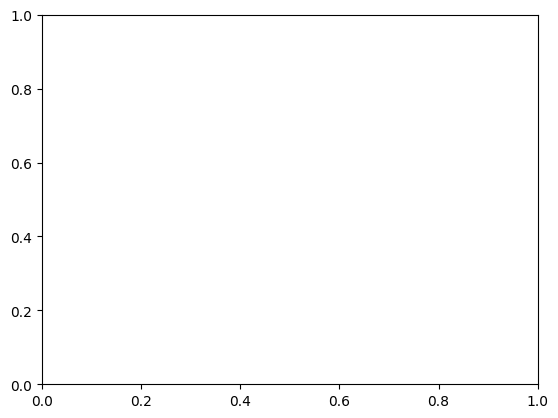

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Define angles for the semicircle
theta = np.linspace(0, np.pi, 200)

# Calculate radius (adjust for chart size)
radius = 1

# Create colormap for the gradient (adjust endpoints for desired colors)
cmap = plt.cm.coolwarm  # Adjust cmap for different color schemes (e.g., 'RdBu_r')

# Normalize values for the colormap (0 to 1)
norm = plt.Normalize(vmin=0, vmax=100)

# Calculate x and y coordinates for the semicircle
a = radius * np.cos( theta )
b = radius * np.sin( theta )

# Calculate color values based on angle for the gradient
colors = cmap(norm(theta))

# Create the plot
fig, ax = plt.subplots()

# Plot the semicircle arc
arc = ax.plot(a, b, color=colors, linewidth=4)

# Set aspect ratio for a semicircle
ax.set_aspect("equal")

# Set labels (optional)
ax.set_xlabel("Value")
# Remove unnecessary labels on semicircle
ax.set_xticks([])
ax.set_ylabel("")
# Remove unnecessary labels on the right side
ax.set_yticks([])

# Set limits slightly bigger than radius for aesthetics
ax.set_xlim(-radius - radius/5, radius + radius/5)
ax.set_ylim(-radius - radius/5, radius + radius/5)

# Set background color to transparent for a cleaner look
ax.set_facecolor('none')

# Remove unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add a title (optional)
ax.set_title("Value Gauge (93)")

plt.show()


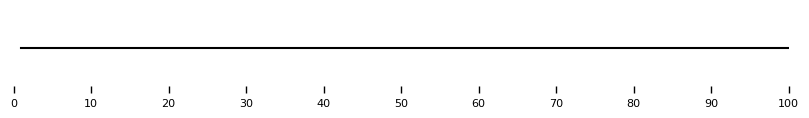

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
x = np.arange(1, 101)
y = np.ones_like(x)

# Plot
fig, ax = plt.subplots(figsize=(10, 1))
ax.plot(x, y, color='black')

# Customize ticks and labels
ax.set_xticks(np.arange(0, 101, 10))
ax.set_yticks([])
ax.set_xticklabels(np.arange(0, 101, 10), fontsize=8)
ax.tick_params(axis='x', length=5, width=1)

# Hide spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set limits
ax.set_xlim(0, 100)
ax.set_ylim(0.8, 1.2)

plt.show()


In [4]:
import plotly.graph_objs as go

# Define gauge parameters
min_value = 0
max_value = 100
target_value = 78

# Create the gauge trace
fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = target_value,
    mode = "gauge+number",
    gauge = {
        'shape': "semicircle",
        'axis': {'range': [min_value, max_value]},
        'steps': [
            {'range': [min_value, 25], 'color': "lightcoral"},
            {'range': [25, 50], 'color': "orange"},
            {'range': [50, 75], 'color': "yellow"},
            {'range': [75, max_value], 'color': "lightgreen"}
        ],
        'threshold': {'line': {'color': "black", 'width': 4}}  # Black needle at target value
    }
))

fig.update_layout(margin={'t': 0, 'b': 0, 'l': 0, 'r': 0})  # Remove extra space around the gauge

fig.show()


ValueError: 
    Invalid value of type 'builtins.str' received for the 'shape' property of indicator.gauge
        Received value: 'semicircle'

    The 'shape' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['angular', 'bullet']

In [3]:
pip install plotly


  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/27/ae/c9fb759b36bc55ccc382b647d1afc23c2a860be8e835f96249996d0aa4df/plotly-5.19.0-py3-none-any.whl.metadata
  Using cached plotly-5.19.0-py3-none-any.whl.metadata (7.0 kB)
Using cached plotly-5.19.0-py3-none-any.whl (15.7 MB)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Python310\python.exe -m pip install --upgrade pip


NameError: name 'matplotlib' is not defined

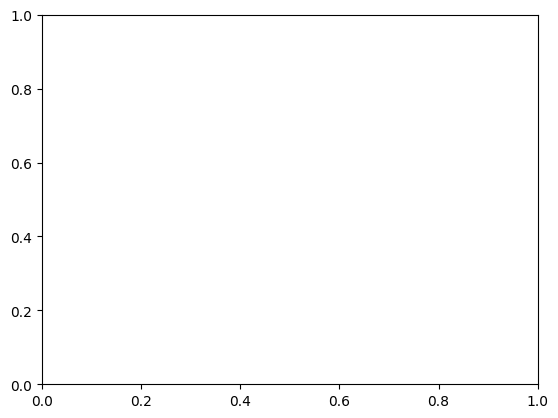

In [2]:
from matplotlib import pyplot as plt

# Define gauge parameters
min_value = 0
max_value = 100
target_value = 78  # Value to point the needle at

# Create the figure and subplot
fig, ax = plt.subplots()

# Set angles for semicircle arc
start_angle = 135
end_angle = 315

# Create the semicircle arc (gray background)
arc = matplotlib.patches.Arc((0.5, 0.5), 0.8, 0.8, angle = 0, 
                             theta1 = start_angle, theta2 = end_angle, 
                             color = 'lightgray', linewidth = 2)
ax.add_patch(arc)
ax.set_aspect('equal')

# Create the gauge labels
ax.text(0.5, 1.1, str(min_value), ha='center', va='center')
ax.text(0.5, 0, str(max_value), ha='center', va='center')

# Calculate angle for the needle based on target value
needle_angle = (target_value - min_value) / (max_value - min_value) * (end_angle - start_angle) + start_angle

# Create the needle (black line)
center = (0.5, 0.5)
radius = 0.6
needle_x = center[0] + radius * np.cos(np.pi * needle_angle / 180)
needle_y = center[1] + radius * np.sin(np.pi * needle_angle / 180)
ax.plot([center[0], needle_x], [center[1], needle_y], color='black', linewidth=3)

# Set limits slightly bigger than gauge to avoid clipping
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

# Remove axes and ticks for a cleaner gauge look
ax.axis('off')

plt.show()
